## Nigeria Covid 19 Data Analysis Using Python 

## Overview

### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus and it has affected many parts of the world. Nigeria, a West-African country with 37 states was also affected by COVID-19 as this pandemic led to shutting down major airports, a nation-wide lockdown and curfews which in turn devastated the economy. 

### The goal of this project is to perform analysis to answer questions and generate insights.

## 1. Data Collection
#### In this step, we will obtain the data required for analysis by: 
#### * Performing web scraping from the NCDC website
#### * Importing data from the John Hopkins Github repository and,
#### * Importing the external data to a DataFrame.

## Import Libraries

In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

## NCDC Website Scrape

In [3]:
# Assigning the webpage url a variable name using requests.get() method
url = 'https://covid19.ncdc.gov.ng/'
covid = requests.get(url)
print(covid.status_code)

200


In [4]:
# Using the BeautifulSoup() function to parse the html
soup = BeautifulSoup(covid.text, 'lxml') 

In [5]:
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [6]:
rows = table.findAll(['tr'])

In [7]:
covidfile = open("naija_covid.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(covidfile)  
try:
    for cell in rows:
        th = cell.find_all('th')
        csvrow = [col.text.strip('\n') for col in th]
        td = cell.find_all('td')
        row = [i.text.replace('\n','') for i in td]
        writer.writerow(csvrow+row) 
        
finally:
    covidfile.close()

In [8]:
naijadf = pd.read_csv('naija_covid.csv')

## John Hopkins Data Repository

In [11]:
# DataFrame One
global_cases_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_globalconfirmed = pd.read_csv(global_cases_confirmed)

In [10]:
# DataFrame Two 
global_recovered_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_globalrecovered = pd.read_csv(global_recovered_cases)

In [12]:
# DataFrame Three 
global_death_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_globaldeath = pd.read_csv(global_death_cases)

## External Data to DataFrame

In [13]:
df_external = pd.read_csv('covid_external.csv')

In [14]:
df_budget = pd.read_csv('Budget data.csv')

In [15]:
df_realgdp = pd.read_csv('RealGDP.csv')

## Viewing the Data

### We obtain basic information about the data using the head() and info() method

In [16]:
naijadf.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,675",3,"11,583",89
4,Plateau,"10,365",4,"10,286",75


In [17]:
naijadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [18]:
df_globalconfirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [19]:
df_globalrecovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [20]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [21]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1020.0+ bytes


In [22]:
df_realgdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [23]:
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [24]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [25]:
# Using the tail() method to get more insight on the DataFrame
naijadf.tail()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
32,Jigawa,669,2,649,18
33,Yobe,638,4,625,9
34,Kebbi,480,10,454,16
35,Zamfara,375,0,366,9
36,Kogi,5,0,3,2


In [26]:
df_budget.tail()

,states,Initial_budget (Bn),Revised_budget (Bn)
32,Sokoto,202.40,153.0
33,Taraba,215.00,150.5
34,Yobe,108.00,86.0
35,Zamfara,188.50,127.3
36,FCT,278.78,199.0


In [27]:
df_external.tail()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
32,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
33,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
34,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
35,Osun,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
36,Ekiti,South West,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03


In [28]:
df_globalconfirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [29]:
df_realgdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


## Data Cleaning and Preparation

####  TODO A: Cleaning the Scraped Data

In [30]:
naijadf.columns = ['states', 'Lab confirmed cases', 'Cases on admission', 'Number of discharged', 'Number of deaths']

In [31]:
naijadf.head()

,states,Lab confirmed cases,Cases on admission,Number of discharged,Number of deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,675",3,"11,583",89
4,Plateau,"10,365",4,"10,286",75


In [32]:
# Remove the extra white spaces and comma and converting 'Lab confirmed cases', 'Cases on admission', 'Number of discharged' to numerical data type
naijadf= naijadf.replace({',':'', ' ':''}, regex=True)
trash = naijadf[['Lab confirmed cases', 'Cases on admission', 'Number of discharged']].columns
naijadf[trash] = naijadf[trash].apply(pd.to_numeric,errors='coerce')

In [33]:
naijadf.head()

,states,Lab confirmed cases,Cases on admission,Number of discharged,Number of deaths
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
3,Kaduna,11675,3,11583,89
4,Plateau,10365,4,10286,75


In [34]:
naijadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   states                37 non-null     object
 1   Lab confirmed cases   37 non-null     int64 
 2   Cases on admission    37 non-null     int64 
 3   Number of discharged  37 non-null     int64 
 4   Number of deaths      37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


#### TODO B: Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria

In [35]:
df_globalconfirmed = df_globalconfirmed.drop(['Province/State', 'Lat', 'Long'], axis= 1)

In [36]:
confirmed_in_nga = df_globalconfirmed.groupby('Country/Region').sum().loc['Nigeria']

In [37]:
confirmed_in_nga = confirmed_in_nga.to_frame().reset_index()

In [38]:
confirmed_in_nga.columns = ['Date', 'Cases']
confirmed_in_nga['Date'] = pd.to_datetime(confirmed_in_nga['Date'])

In [39]:
confirmed_in_nga.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [40]:
confirmed_in_nga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1143 non-null   datetime64[ns]
 1   Cases   1143 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.0 KB


In [41]:
confirmed_in_nga.tail()

,Date,Cases
1138,2023-03-05,266598
1139,2023-03-06,266598
1140,2023-03-07,266598
1141,2023-03-08,266598
1142,2023-03-09,266598


#### TODO C: Get a Pandas DataFrame for Daily Recovered cases in Nigeria

In [42]:
df_globalrecovered = df_globalrecovered.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [43]:
recovered_in_nga = df_globalrecovered.groupby('Country/Region').sum().loc['Nigeria']

In [44]:
recovered_in_nga = recovered_in_nga.to_frame().reset_index()

In [45]:
recovered_in_nga.columns = ['Date', 'Cases']

In [46]:
recovered_in_nga['Date'] = pd.to_datetime(recovered_in_nga['Date'])

In [47]:
recovered_in_nga.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [48]:
recovered_in_nga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1143 non-null   datetime64[ns]
 1   Cases   1143 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.0 KB


In [49]:
df_globaldeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


#### TODO D: Get a Pandas DataFrame for Daily Death Cases in Nigeria

In [50]:
df_globaldeath2 = df_globaldeath.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [51]:
death_in_nga = df_globaldeath.groupby('Country/Region').sum().loc['Nigeria']

In [52]:
death_in_nga = death_in_nga.to_frame().reset_index()

In [53]:
death_in_nga.columns = ['Date','Cases']

In [ ]:
death_in_nga['Date'] = pd.to_datetime(death_in_nga)

In [55]:
death_in_nga.head()

,Date,Cases
0,Province/State,0
1,Lat,9.082
2,Long,8.6753
3,1/22/20,0
4,1/23/20,0


In [56]:
death_in_nga.tail()

,Date,Cases
1141,3/5/23,3155
1142,3/6/23,3155
1143,3/7/23,3155
1144,3/8/23,3155
1145,3/9/23,3155


In [60]:
death_in_nga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1146 non-null   object
 1   Cases   1146 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


## Data Analysis

### TODO A
### Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

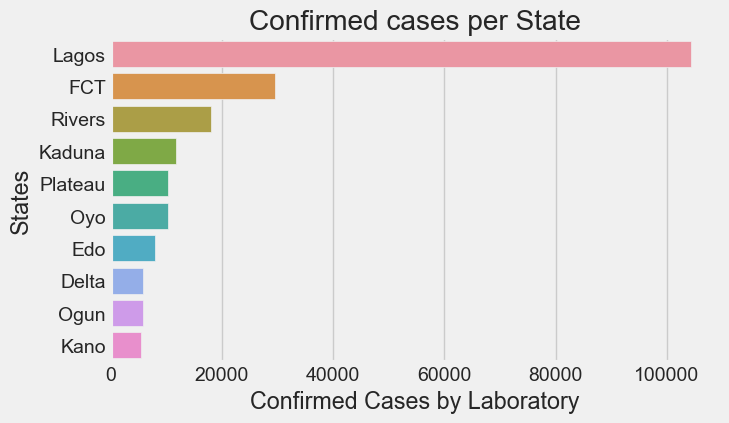

In [61]:
data = naijadf.nlargest(10, 'Lab confirmed cases')
fig = plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Lab confirmed cases', y='states', data=data[['states', 'Lab confirmed cases']])
ax.set_title('Confirmed cases per State')
ax.set_xlabel('Confirmed Cases by Laboratory')
ax.set_ylabel('States');

#### Insight: Lagos State has the highest number of confirmed cases by laboratory, followed by FCT. There is a large margin between the first and second.

### TODO B
### Generate a plot that shows the Top 10 states in terms of Discharged Covid cases.

Text(0.5, 1.0, 'Discharged cases per State')

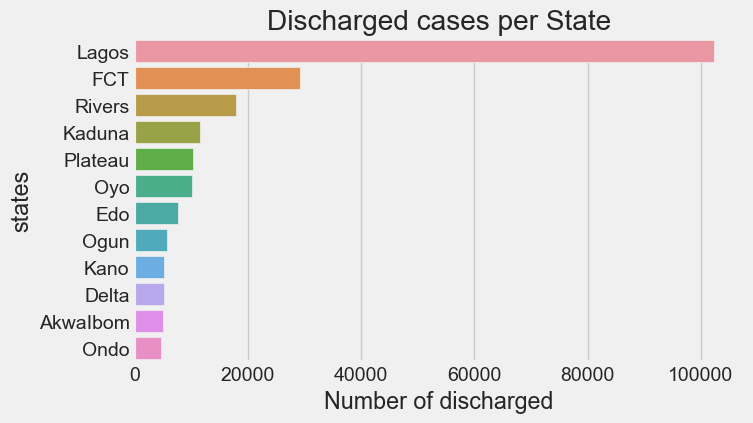

In [62]:
fig = plt.figure(figsize=(7, 4))
bar = sns.barplot(x='Number of discharged', y='states', data=naijadf[['states', 'Number of discharged']].sort_values(by=['Number of discharged'],ascending=False).loc[:10])
bar.set_xlabel('Number of discharged')
bar.set_title('Discharged cases per State')

#### Lagos State has the highest number of discharged cases, followed by FCT and Rivers

### TODO C
### Generate a plot that shows the top 10 Death cases by state

Text(0, 0.5, 'States affected')

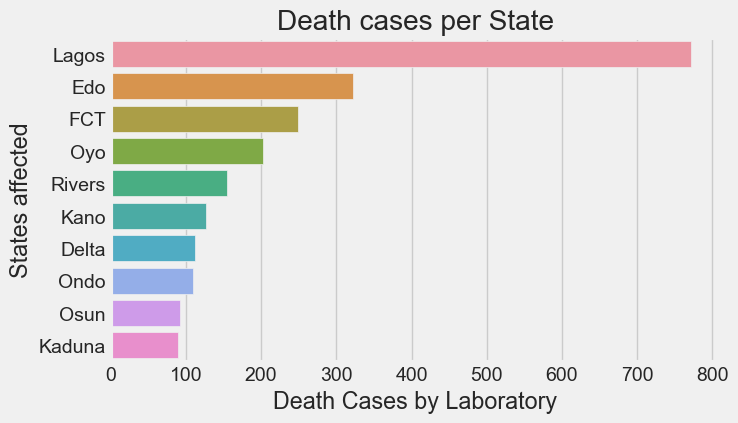

In [63]:
data = naijadf.nlargest(10, 'Number of deaths')
fig = plt.figure(figsize=(7, 4))
bar = sns.barplot(x='Number of deaths', y='states', data=data[['states', 'Number of deaths']])
bar.set_title('Death cases per State')
bar.set_xlabel('Death Cases by Laboratory')
bar.set_ylabel('States affected')

#### Lagos State has the highest number of deaths as confirmed by lab, followed by Edo State and FCT.

### TODO E 
### Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

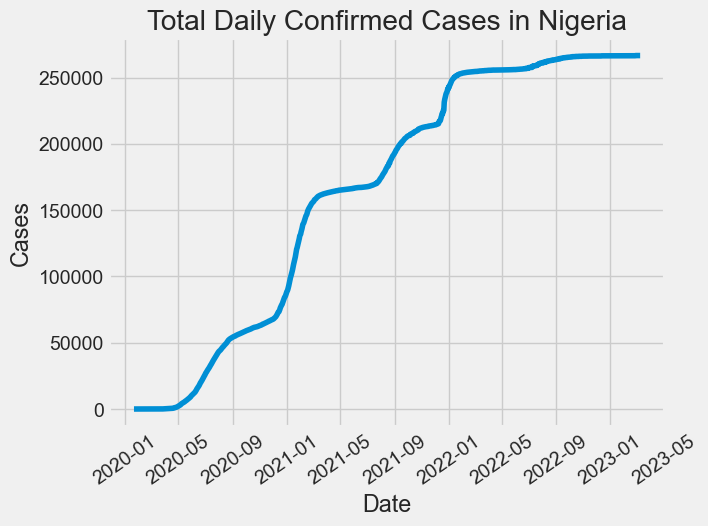

In [64]:
sns.lineplot(x="Date", y="Cases", data=confirmed_in_nga)
plt.xticks(rotation=35)
plt.title('Total Daily Confirmed Cases in Nigeria')
plt.show()

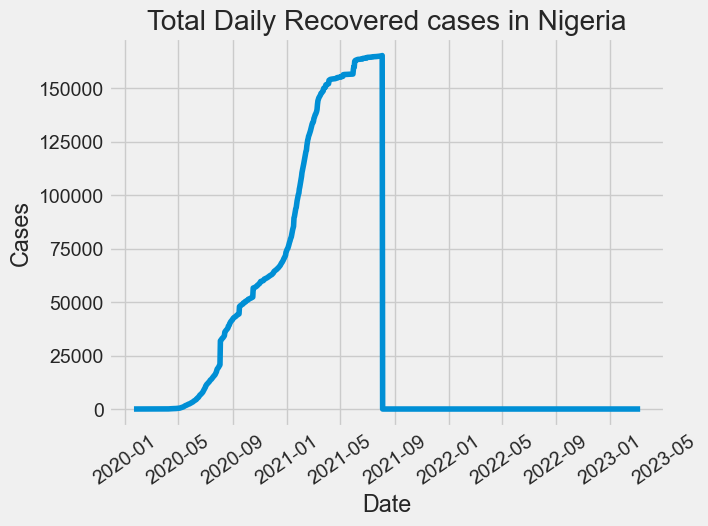

In [65]:
sns.lineplot(x="Date", y="Cases", data=recovered_in_nga)
plt.xticks(rotation=35)
plt.title('Total Daily Recovered cases in Nigeria')
plt.show()

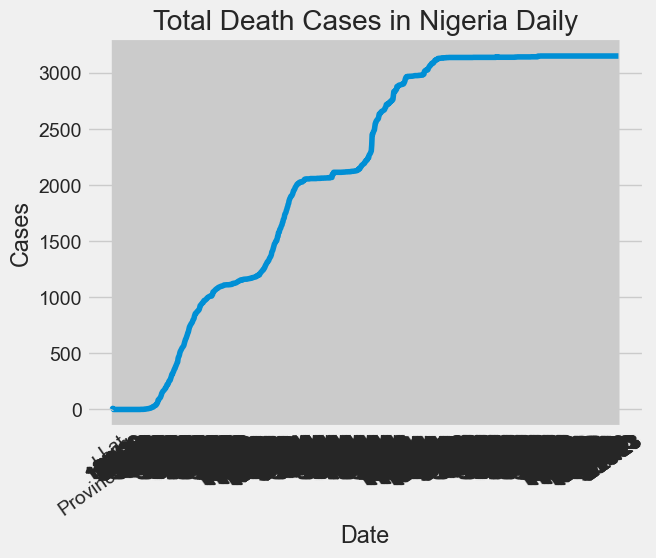

In [68]:
sns.lineplot(x="Date", y="Cases", data=death_in_nga)
plt.xticks(rotation=35)
plt.title('Total Death Cases in Nigeria Daily')
plt.show()

### Insight: From the plots above, we can see that as the recovered cases went down, the death toll went up.

### TODO-F 
### Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases. 
### Generate a line plot for the above

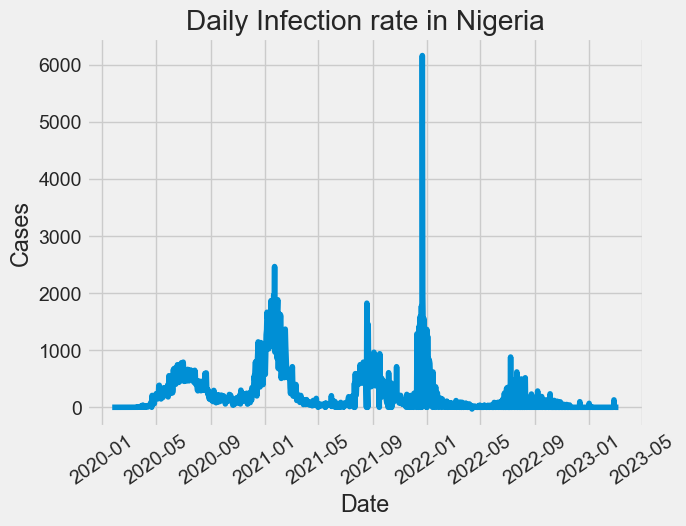

In [67]:
y = confirmed_in_nga['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confirmed_in_nga)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

### TODO-G 
### Calculate maximum infection rate for a day (Number of new cases). Find the date

In [69]:
y.max()

6158.0

In [70]:
confirmed_in_nga['IFR'] = confirmed_in_nga['Cases'].diff()
confirmed_in_nga.loc[confirmed_in_nga['IFR'] == y.max()]

,Date,Cases,IFR
700,2021-12-22,231413,6158.0


#### On the 22nd of December,2021, Nigeria recorded the highest amount of new cases: 6,158

## TODO-H
###  Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. 

#### Step one: Combine the two dataset together on a common column(states) 
#### Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases.

In [71]:
df_merge = pd.merge(naijadf, df_external, how = 'outer', on= ['states'])

In [72]:
df_merge.head()

,states,Lab confirmed cases,Cases on admission,Number of discharged,Number of deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104286.0,1143.0,102372.0,771.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29535.0,9.0,29277.0,249.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18112.0,-3.0,17960.0,155.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11675.0,3.0,11583.0,89.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10365.0,4.0,10286.0,75.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [73]:
df_merge.tail()

,states,Lab confirmed cases,Cases on admission,Number of discharged,Number of deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
35,Zamfara,375.0,0.0,366.0,9.0,North West,4974000.0,0.9,0.2,0.1,0.7,0.8,0.2,1.0,0.9,0.87
36,Kogi,5.0,0.0,3.0,2.0,North Central,4970000.0,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
37,Nassarawa,NaN,NaN,NaN,NaN,North Central,2783000.0,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
38,Akwa Ibom,NaN,NaN,NaN,NaN,South East,6093000.0,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01
39,Cross river,NaN,NaN,NaN,NaN,South South,4272000.0,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98


In [74]:
df_tcase = df_merge.nlargest(11, 'Lab confirmed cases')

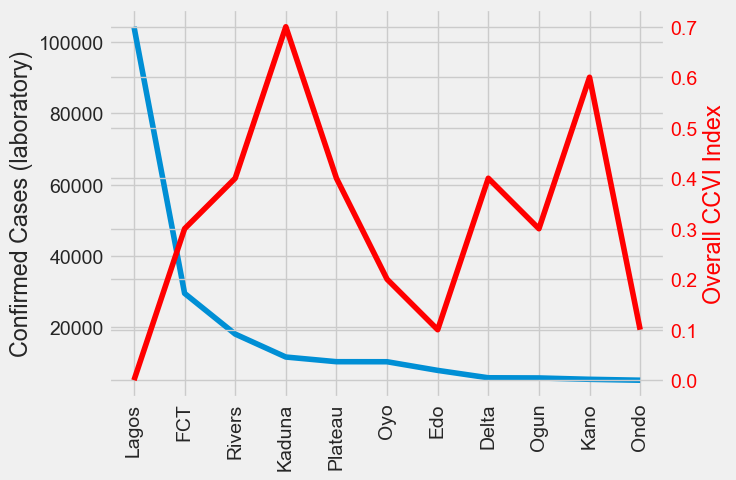

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcase['states'], df_tcase['Lab confirmed cases'])
ax1.set_ylabel('Confirmed Cases (laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcase['states'], df_tcase['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

### Observation: Kaduna has the highest CCVI index despite the average amount of confirmed cases. This is due to the low rate of medical health system and infrastructure in the state.
### Lagos has the lowest CCVI index despite having the highest amount of confirmed cases. This is as a result of the adequate medical infrastructure and the social distancing operation that took place in the state.

## TODO-I 
### Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
### Here we will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.

<Axes: xlabel='Population Density', ylabel='Lab confirmed cases'>

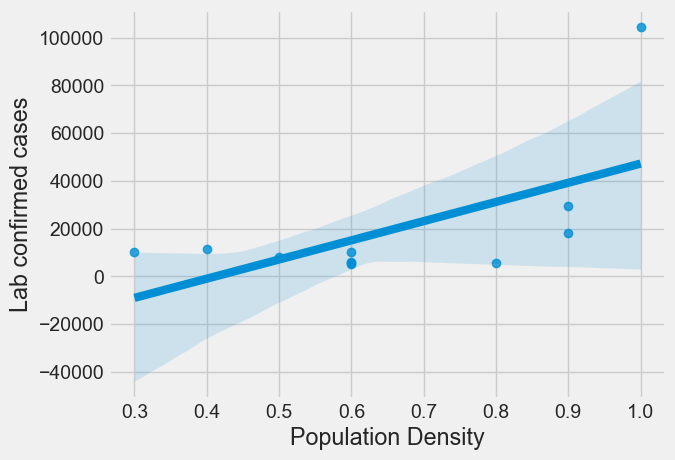

In [76]:
sns.regplot(data = df_tcase, x="Population Density", y="Lab confirmed cases")

### From the plot above, we can see that there is positive correlation between the COVID 19 Lab confirmed cases and Population density. This means that there are high cases of lab confirmed cases in areas that are densely populated.

## TODO-J 
### Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.

## TODO-L
### Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020) 

#### Steps
#### 1. From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
#### 2. .Set your quarter legend to lower left. 
#### 3.  Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020. 

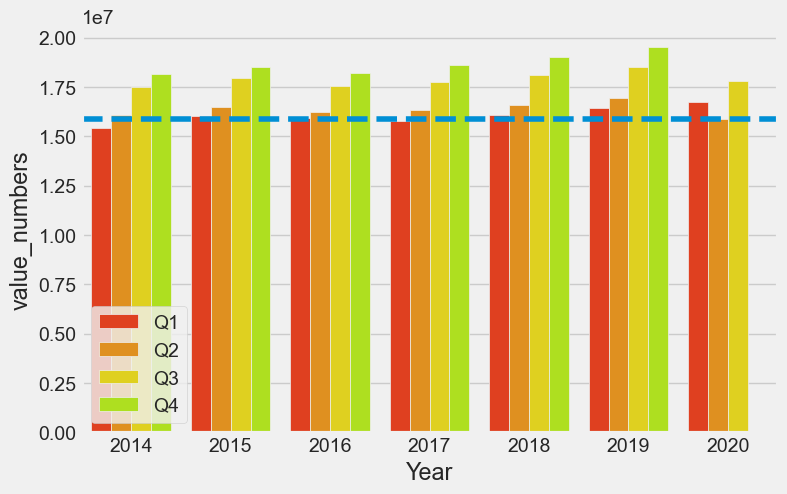

In [77]:
plt.figure(figsize=(8,5))
columns = ["Year", "Q1", "Q2", "Q3", "Q4"]
melted_data = pd.melt(df_realgdp, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=melted_data, palette= 'prism')
plt.legend(loc='lower left')

g.axhline(1.586e7, ls='--')
plt.show()

#### From the plot above, we see that in the second quarter, from the month of May to August, COVID-19 deeply affected the economy. This is a point at which Coronavirus was at it's peak.